In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

In [ ]:
from lobgpt.hdb import get_dataset

In [17]:
RCS = [f"{coin}USDT" for coin in ["BTC", "ETH", "XRP", "SOL", "DOGE"]]
TIMES = ['250912.000100', '250913.215000']

# <font color="grey">Data loading and handling</font>

Data is available in two forms: limit order book (LOB) and data sampled at fixed intervals (for example, seconds). The timestamps are given in nanosecond resolution as Unix timestamps, but the granularity of the data is not that fine. A simple dataloader and some helper function to convert Python datetime objects or strings of the form '240802.1450' into timestamps are provided. The 'book' data contains the bid and ask prices and volumes up to a specified depth (the maximum depth is currently 25).

In [18]:
# At the moment, we are only concerned with data available through the Tardis dataset.
dl = get_dataset("tardis")

####  <a id='chapter1'> <font color="grey">1. Limit Order Book</font></a>

In [19]:
df = dl.load_book("BTCUSDT", TIMES, depth=10)

In [20]:
df.shape

(2675750, 42)

In [21]:
# Add human readable timestamp and mid prices
df = df.ds.add_datetime('ts')
df.head()

ts,ts_local,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,bids[1].price,bids[1].amount,asks[2].price,asks[2].amount,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,asks[5].price,asks[5].amount,bids[5].price,bids[5].amount,asks[6].price,asks[6].amount,bids[6].price,bids[6].amount,asks[7].price,asks[7].amount,bids[7].price,bids[7].amount,asks[8].price,asks[8].amount,bids[8].price,bids[8].amount,asks[9].price,asks[9].amount,bids[9].price,bids[9].amount,dts
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns]
1757635260022000000,1757635260024511000,115550.1,2.003,115550.0,12.37,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.5,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.043,115548.0,0.002,2025-09-12 00:01:00.022
1757635260073000000,1757635260076180000,115550.1,1.994,115550.0,12.4,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.5,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.001,115548.0,0.002,2025-09-12 00:01:00.073
1757635260124000000,1757635260126511000,115550.1,2.028,115550.0,11.703,115550.2,0.005,115549.9,0.18,115550.3,0.004,115549.8,0.005,115550.4,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.2,0.018,115548.2,0.003,115551.3,0.006,115548.0,0.002,2025-09-12 00:01:00.124
1757635260175000000,1757635260178001000,115550.1,2.324,115550.0,11.429,115550.2,0.005,115549.9,0.18,115550.3,0.004,115549.8,0.005,115550.4,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.2,0.018,115548.2,0.003,115551.3,0.006,115548.0,0.002,2025-09-12 00:01:00.175
1757635260228000000,1757635260232055000,115550.1,2.235,115550.0,11.408,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.6,0.01,115549.5,0.046,115550.7,0.001,115549.4,0.002,115550.8,0.6,115549.2,0.004,115550.9,0.102,115549.0,0.087,115551.2,0.018,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.001,115548.0,0.002,2025-09-12 00:01:00.228


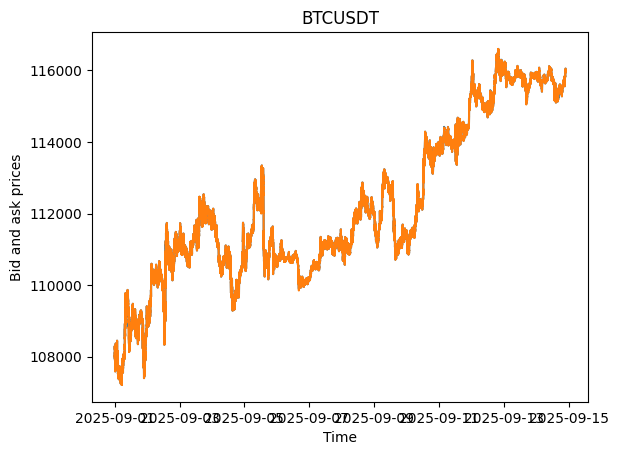

In [9]:
plt.plot(df['dts'], df['asks[0].price'], df['dts'], df['bids[0].price'])
plt.xlabel('Time')
plt.ylabel('Bid and ask prices')
plt.title(f'{RCS[0]}')
plt.show()

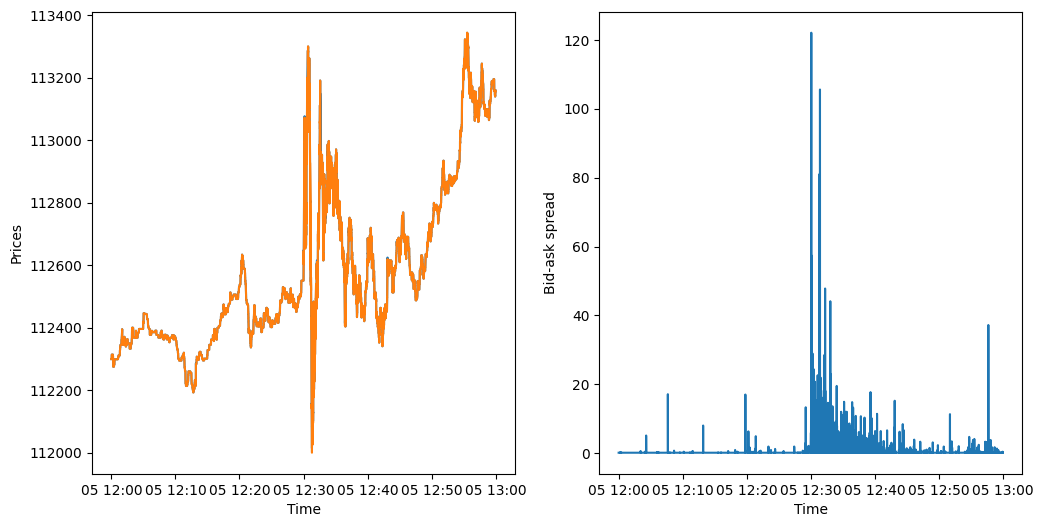

In [10]:
df = dl.load_book("BTCUSDT", ["250905.120000", "250905.130000"], depth=1)
df = df.ds.add_datetime('ts')
fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(df['dts'], df['asks[0].price'], df['dts'], df['bids[0].price'])
ax[1].plot(df['dts'], df['asks[0].price'] - df['bids[0].price'])
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Prices')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Bid-ask spread')
plt.show()

####  <a id='chapter2'> <font color="grey">2. Fixed-frequency data (bars)</font></a>

In [11]:
df = dl.load_sync(["BTCUSDT", "ETHUSDT"], ["250605.120000", "250605.150000"], col="mid", freq="1s")

In [12]:
df.head()

ts,mid_BTCUSDT,mid_ETHUSDT
datetime[ns],f64,f64
2025-06-05 12:00:01,104772.75,2606.635
2025-06-05 12:00:02,104772.75,2606.635
2025-06-05 12:00:03,104772.75,2606.655
2025-06-05 12:00:04,104772.75,2606.655
2025-06-05 12:00:05,104772.75,2606.655


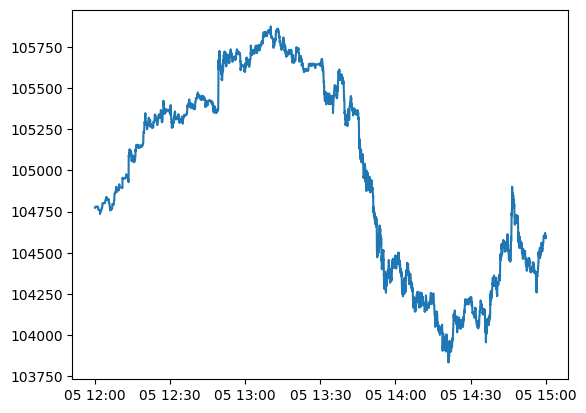

In [13]:
plt.plot(df['ts'], df['mid_BTCUSDT'])
plt.show()

####  <a id='chapter3'> <font color="grey">3. Trades</font></a>

In [14]:
tdf = dl.load_trades(["BTCUSDT", "ETHUSDT", "SOLUSDT", "XRPUSDT", "DOGEUSDT"], TIMES)
tdf.head()

ts,ts_local,product,id,side,price,vol
i64,i64,str,i64,i32,f64,f64
1756684860023000000,1756684860027020000,"""SOLUSDT""",2630175352,1,200.37,13.79
1756684860023000000,1756684860027045000,"""SOLUSDT""",2630175353,1,200.37,1.0
1756684860023000000,1756684860027046000,"""SOLUSDT""",2630175354,1,200.37,0.11
1756684860023000000,1756684860027046000,"""SOLUSDT""",2630175355,1,200.37,21.28
1756684860023000000,1756684860027046000,"""SOLUSDT""",2630175356,1,200.37,4.0


####  <a id='chapter4'> <font color="grey">4. PyTorch Dataset</font></a>

In [22]:
# Add TLOB labels
df = add_tlob_labels(df, horizons=[10, 20, 50])
df = add_lob_features(df, depth=10)


Horizon 10:
  Alpha threshold: 0.000002
  Up: 167110 (6.2%)
  Stationary: 2346680 (87.7%)
  Down: 161960 (6.1%)

Horizon 20:
  Alpha threshold: 0.000005
  Up: 221134 (8.3%)
  Stationary: 2238826 (83.7%)
  Down: 215790 (8.1%)

Horizon 50:
  Alpha threshold: 0.000011
  Up: 347255 (13.0%)
  Stationary: 1986330 (74.2%)
  Down: 342165 (12.8%)


In [23]:
df.head()

ts,ts_local,asks[0].price,asks[0].amount,bids[0].price,bids[0].amount,asks[1].price,asks[1].amount,bids[1].price,bids[1].amount,asks[2].price,asks[2].amount,bids[2].price,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,asks[5].price,asks[5].amount,bids[5].price,bids[5].amount,asks[6].price,asks[6].amount,bids[6].price,bids[6].amount,asks[7].price,asks[7].amount,bids[7].price,bids[7].amount,asks[8].price,asks[8].amount,bids[8].price,bids[8].amount,asks[9].price,asks[9].amount,bids[9].price,bids[9].amount,dts,mid_price,pct_change_h10,label_h10,pct_change_h20,label_h20,pct_change_h50,label_h50,spread,volume_imbalance_0,volume_imbalance_1,volume_imbalance_2,volume_imbalance_3,volume_imbalance_4,volume_imbalance_5,volume_imbalance_6,volume_imbalance_7,volume_imbalance_8,volume_imbalance_9,total_volume_best,weighted_mid_price
i64,i64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,datetime[ns],f64,f64,i32,f64,i32,f64,i32,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
1757635260022000000,1757635260024511000,115550.1,2.003,115550.0,12.37,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.5,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.043,115548.0,0.002,2025-09-12 00:01:00.022,115550.05,null,1,null,1,null,1,0.1,0.721283,0.945946,0.111111,0.84,-0.5,0.6,-0.746725,-0.906542,-0.333333,-0.911111,14.373,115550.086064
1757635260073000000,1757635260076180000,115550.1,1.994,115550.0,12.4,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.5,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.001,115548.0,0.002,2025-09-12 00:01:00.073,115550.05,null,1,null,1,null,1,0.1,0.72294,0.945946,0.111111,0.84,-0.5,0.6,-0.746725,-0.906542,-0.333333,0.333333,14.394,115550.086147
1757635260124000000,1757635260126511000,115550.1,2.028,115550.0,11.703,115550.2,0.005,115549.9,0.18,115550.3,0.004,115549.8,0.005,115550.4,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.2,0.018,115548.2,0.003,115551.3,0.006,115548.0,0.002,2025-09-12 00:01:00.124,115550.05,null,1,null,1,null,1,0.1,0.70461,0.945946,0.111111,0.84,-0.5,0.6,-0.746725,-0.906542,-0.714286,-0.5,13.731,115550.085231
1757635260175000000,1757635260178001000,115550.1,2.324,115550.0,11.429,115550.2,0.005,115549.9,0.18,115550.3,0.004,115549.8,0.005,115550.4,0.004,115549.5,0.046,115550.6,0.006,115549.4,0.002,115550.7,0.001,115549.2,0.004,115550.8,0.6,115549.0,0.087,115550.9,0.102,115548.6,0.005,115551.2,0.018,115548.2,0.003,115551.3,0.006,115548.0,0.002,2025-09-12 00:01:00.175,115550.05,null,1,null,1,null,1,0.1,0.662037,0.945946,0.111111,0.84,-0.5,0.6,-0.746725,-0.906542,-0.714286,-0.5,13.753,115550.083102
1757635260228000000,1757635260232055000,115550.1,2.235,115550.0,11.408,115550.2,0.005,115549.9,0.18,115550.4,0.004,115549.8,0.005,115550.6,0.01,115549.5,0.046,115550.7,0.001,115549.4,0.002,115550.8,0.6,115549.2,0.004,115550.9,0.102,115549.0,0.087,115551.2,0.018,115548.6,0.005,115551.3,0.006,115548.2,0.003,115551.4,0.001,115548.0,0.002,2025-09-12 00:01:00.228,115550.05,null,1,null,1,null,1,0.1,0.672359,0.945946,0.111111,0.642857,0.333333,-0.986755,-0.079365,-0.565217,-0.333333,0.333333,13.643,115550.083618
